In [1]:
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
import matplotlib.pyplot as plt
import numpy as np

hdulist = fits.open('/home/tahir/ss21-astronomy-tasks/data/gll_iem_v02_P6_V11_DIFFUSE.fit')

hdulist.info()
# there are 2 HDU's present in the FITS file.
print("2 HDU's present")

Filename: /home/tahir/ss21-astronomy-tasks/data/gll_iem_v02_P6_V11_DIFFUSE.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   
2 HDU's present


In [2]:
hdu = hdulist[0]
print(hdu.header)
#length of axis 3 is 30
#axis 3 represents the photon energy
#units of axis 3 is MeV
#Telescope = 'Glast'
#Observer = Michelson

answers = ['30', 'Photon energy', 'MeV', 'GLAST', 'MICHELSON']

SIMPLE  =                    T / Written by IDL:  Thu Jan 20 07:19:05 2011      BITPIX  =                  -32 /                                                NAXIS   =                    3 / number of data axes                            NAXIS1  =                  720 / length of data axis 1                          NAXIS2  =                  360 / length of data axis 2                          NAXIS3  =                   30 / length of data axis 3                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H FLUX    =        8.42259635886 /                                                CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             CDELT1  =                  0.5 / Step size in longitude                         CRPIX1  =                360.5 / Pixel t

In [4]:
img_data = hdu.data
img_slice = img_data[0]

maximum_pixel_value = np.max(img_slice)
minimum_pixel_value = np.min(img_slice)
standard_deviation = np.std(img_slice)

print("Maximum pixel value for first slice = ", maximum_pixel_value)
print("Minimum pixel value for first slice = ", minimum_pixel_value)
print("Standard Deviation for first slice = ", standard_deviation)

# Maximum pixel value = 4.5921523e-05
# Minimum pixel value = 7.027717e-08
# Standard deviation = 1.3843595e-06


Maximum pixel value =  4.5921523e-05
Minimum pixel value =  7.027717e-08
Standard Deviation =  1.3843595e-06


Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
    Display data as an image, i.e., on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image set up the colormapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
    The number of pixels used to render an image is set by the Axes size
    and the *dpi* of the figure. This can lead to aliasing artifacts when
    the image is resampled because the displayed image size will usually
    not match the size of *X* (see
    :doc:`/gallery/images_contours_and_fields/image_antialiasing`).
    The resampling can be controlled via the *interpolation* parameter
    and/or :rc:`image.interpolation`.

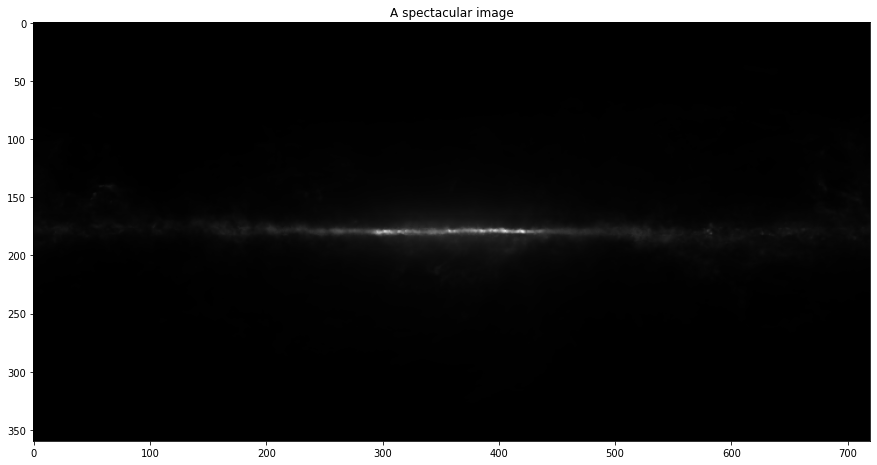

In [6]:
help(plt.imshow)
plt.title('A spectacular image')
plt.rcParams['figure.figsize'] = [15, 15]
plt.imshow(img_slice, cmap = 'gray', vmin = minimum_pixel_value, vmax = maximum_pixel_value)


In [7]:
new_img_data = img_data[4]+img_data[9]+img_data[14]+img_data[19]+img_data[24]+img_data[29]

new_maximum = np.max(new_img_data)
new_minimum = np.min(new_img_data)
new_standard_deviation = np.std(new_img_data)

print("Maximum pixel value for stack = ", new_maximum)
print("Minimum pixel value for stack = ", new_minimum)
print("Standard Deviation for stack = ", new_standard_deviation)

# Maximum pixel value = 1.0907543e-05
# Minimum pixel value = 1.2774165e-08
# Standard deviation = 3.5807247e-07

Maximum pixel value for stack =  1.0907543e-05
Minimum pixel value for stack =  1.2774165e-08
Standard Deviation for stack =  3.5807247e-07


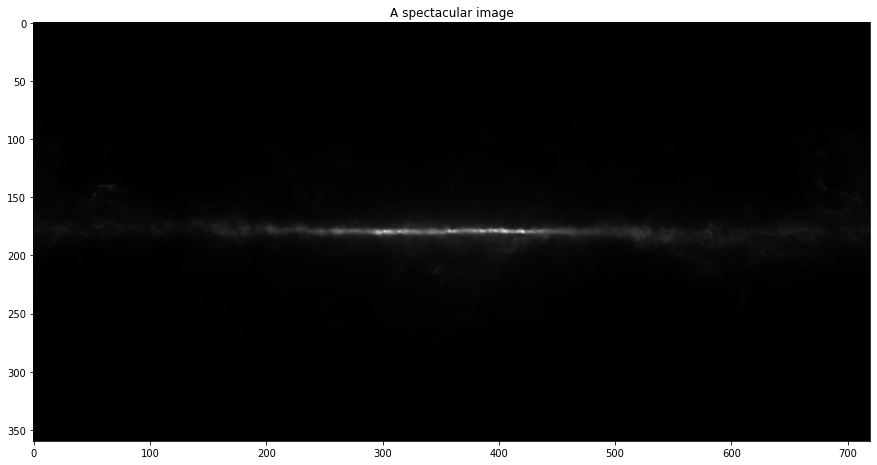

In [8]:
plt.title('A spectacular image')
plt.rcParams['figure.figsize'] = [15, 15]
plt.imshow(new_img_data, cmap = 'gray', vmin = new_minimum, vmax = new_maximum)

In [9]:
def Altitude(coordinates, time):
    iitm = EarthLocation(lat=12.992*u.deg, lon=80.234*u.deg, height=50*u.m)
    times = []
    for i in range(13):
        times.append(time+(i-5.5)*u.hour)
    
    coords = coordinates.transform_to(AltAz(obstime=times, location=iitm)).alt
    x_axis = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    plt.plot(x_axis,coords)